### Module 8: Dimensionality Reduction

#### Case Study–1

Objective:

• Understand and practice principal component analysis using scikit learn.

#### 1. Scikit learn comes with the pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]

Dataset shape: (1797, 64)
Target shape: (1797,)


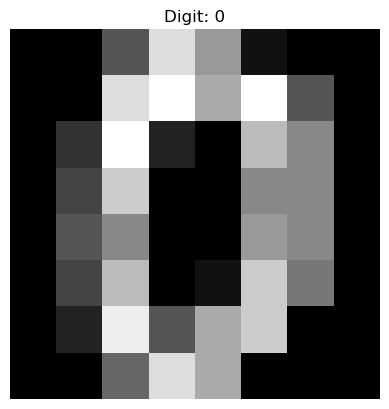

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Step 1: Load the digits dataset
digits = load_digits()

print("Dataset shape:", digits.data.shape) 
print("Target shape:", digits.target.shape) 

# Step 2: Helper function to plot a digit image
def plot_digit(index):
    """
    Plots the digit image at the given index from the digits dataset.
    """
    image = digits.images[index] 
    label = digits.target[index] 
    
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis('off')
    plt.show()

plot_digit(0)

#### 2. Make a train-test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = digits.data      # features (64 pixel values per image)
y = digits.target    # target labels (0–9 digits)

# Train-test split (20% test size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Test Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### 3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]


In [6]:
from sklearn.decomposition import PCA

# Perform PCA with 95% variance explained
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Find number of components
num_components = pca.n_components_
print("Number of components to explain 95% variance:", num_components)

Number of components to explain 95% variance: 29


#### 4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]


In [8]:
# PCA transformation (retain 95% variance)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA components:", pca.n_components_)

# Fit Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Logistic Regression Accuracy (PCA-transformed data):", accuracy_pca)


Number of PCA components: 28
Logistic Regression Accuracy (PCA-transformed data): 0.9555555555555556


#### 5. Compute the confusion matrix and count the number of instances that have gone wrong. For each wrong sample, plot the digit along with the predicted and original label.

Confusion Matrix:
 [[35  0  1  0  0  0  0  0  0  0]
 [ 0 32  0  1  0  0  0  0  3  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  4  0  0  0  1  0  0 30  0]
 [ 0  0  0  0  1  0  0  0  1 34]]
Number of misclassified samples: 15


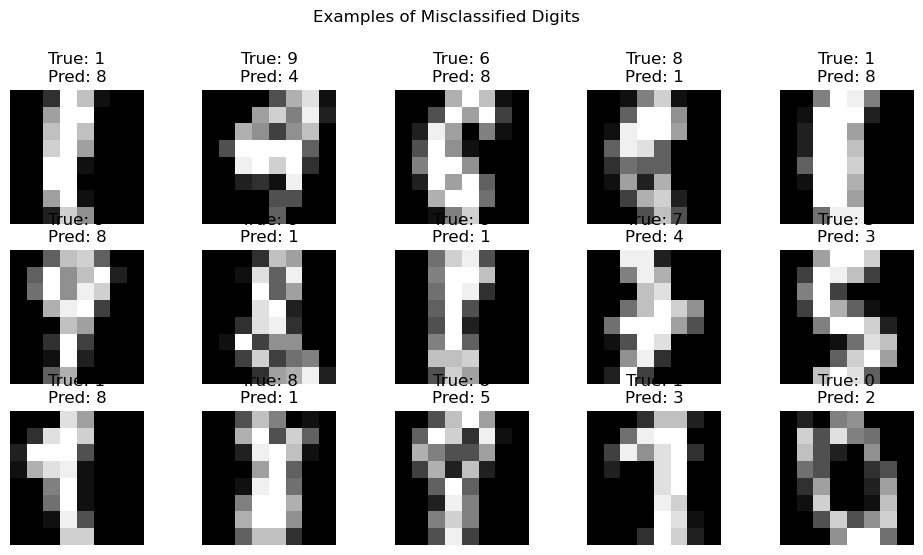

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = log_reg.predict(X_test)  # Using original data

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Count misclassified instances
misclassified_indices = np.where(y_test != y_pred)[0]
print("Number of misclassified samples:", len(misclassified_indices))

# Plot misclassified samples
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:20]):  # plot first 20 misclassified samples
    image = X_test[idx].reshape(8, 8)  # reshape back to 8x8 image
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')

plt.suptitle("Examples of Misclassified Digits")
plt.show()